In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE= 32
IMAGE_SIZE= 255
CHANNEL= 3
EPOCHS= 20 

In [3]:


# Train Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Sachin Singh\Downloads\archive\Potato\Train",
    seed=123,
    shuffle=True,
    image_size=[IMAGE_SIZE,IMAGE_SIZE],
    batch_size= BATCH_SIZE
)
class_names = train_ds.class_names
num_classes = len(class_names)

# Validation Dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Sachin Singh\Downloads\archive\Potato\Valid",
    seed=123,
    shuffle=True,
    image_size=[IMAGE_SIZE,IMAGE_SIZE],
    batch_size= BATCH_SIZE
)

# Test Dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Sachin Singh\Downloads\archive\Potato\Test",
    seed=123,
    shuffle=False,   # ❗ Test me shuffle usually False rakhte hain
    image_size=[IMAGE_SIZE,IMAGE_SIZE],
    batch_size= BATCH_SIZE
)


Found 900 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [4]:
len(test_ds),len(val_ds),len(train_ds)

(10, 10, 29)

In [5]:
train_ds.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [7]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [8]:


model = keras.Sequential([
    data_augmentation,
    
    layers.Rescaling(1./255, input_shape=(256,256,3)),

    layers.Conv2D(32,(3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128,(3,3), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation="softmax")
])

E:\prerna\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [13]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop],
    verbose = 1
)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9067 - loss: 0.2477 - val_accuracy: 0.9400 - val_loss: 0.1719
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8878 - loss: 0.2968 - val_accuracy: 0.9067 - val_loss: 0.2090
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8989 - loss: 0.2555 - val_accuracy: 0.9167 - val_loss: 0.1937
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9122 - loss: 0.2415 - val_accuracy: 0.9033 - val_loss: 0.2503
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.9289 - loss: 0.1843 - val_accuracy: 0.9333 - val_loss: 0.1793
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9100 - loss: 0.2250 - val_accuracy: 0.9233 - val_loss: 0.1787


In [14]:
test_loss, test_acc = model.evaluate(test_ds)

print("Test Accuracy:", test_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9700 - loss: 0.1222
Test Accuracy: 0.9700000286102295


In [15]:
history.history['loss'][:5]

[0.24766461551189423,
 0.2967803478240967,
 0.2554883062839508,
 0.24153736233711243,
 0.18432123959064484]

In [29]:
import seaborn as sns 

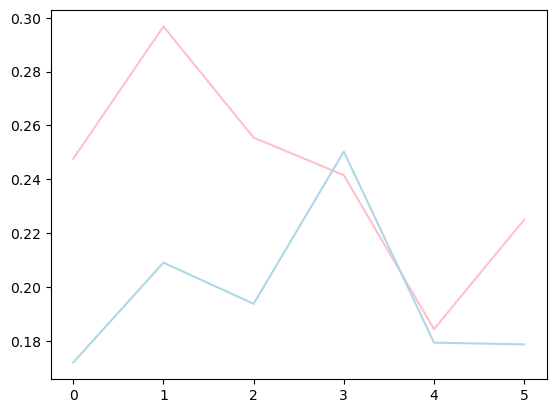

In [17]:
plt.plot(history.history["loss"], color="pink")
plt.plot(history.history["val_loss"],color="lightblue")
plt.show()

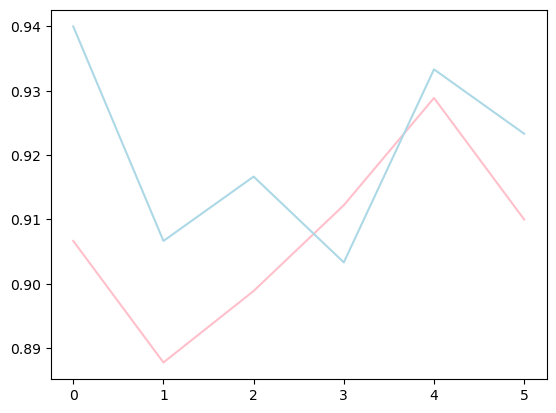

In [18]:
plt.plot(history.history["accuracy"], color="pink")
plt.plot(history.history["val_accuracy"],color="lightblue")
plt.show()

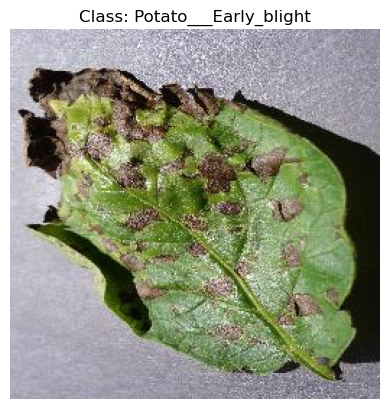

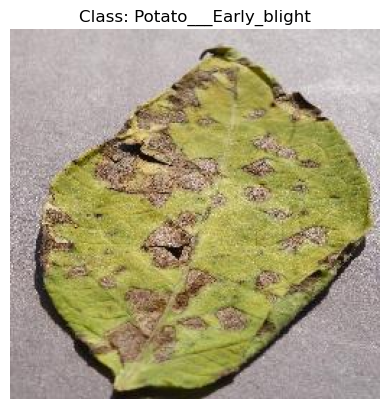

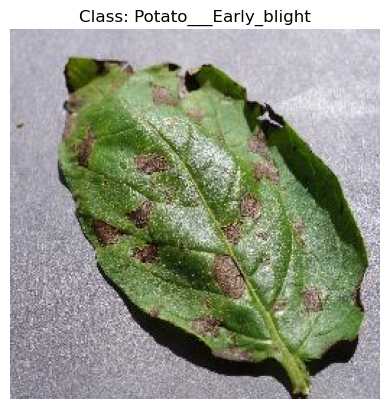

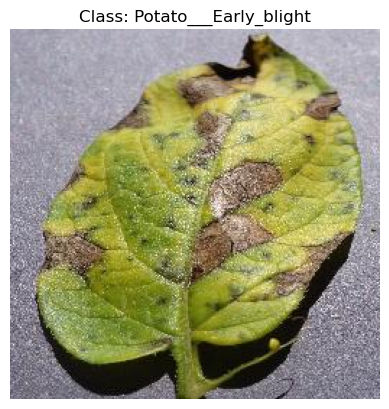

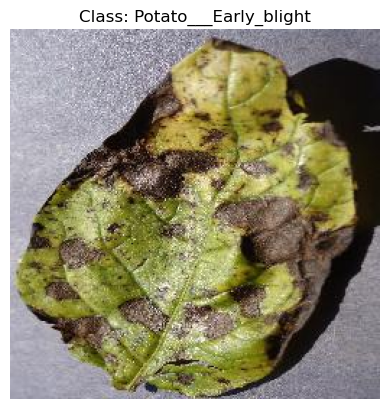

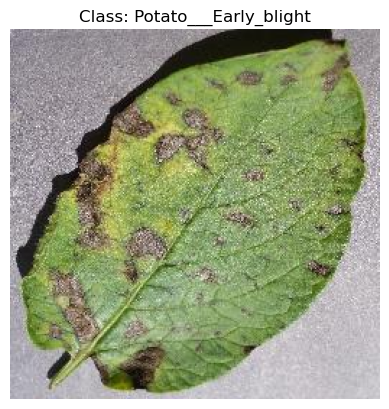

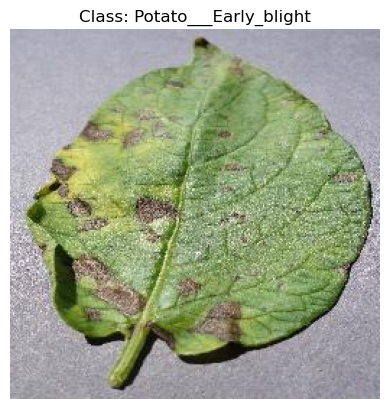

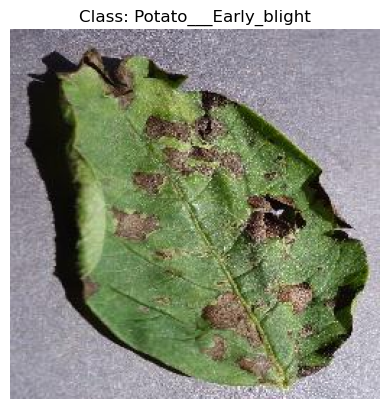

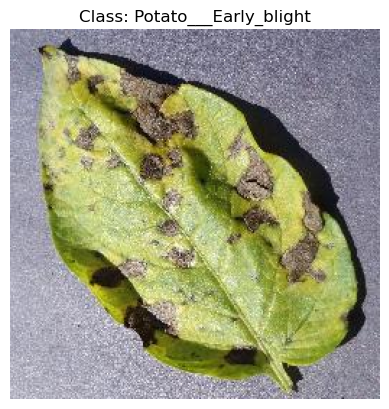

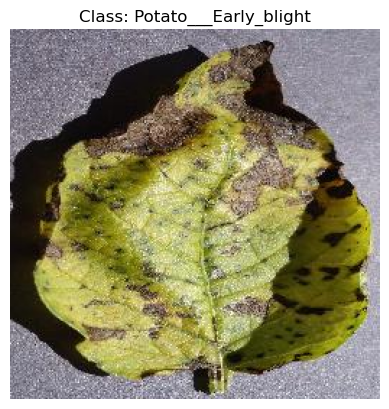

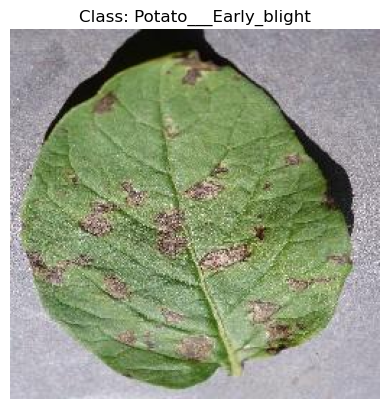

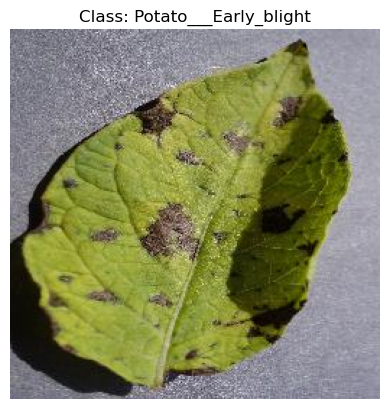

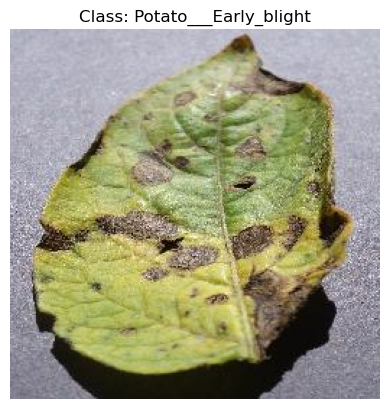

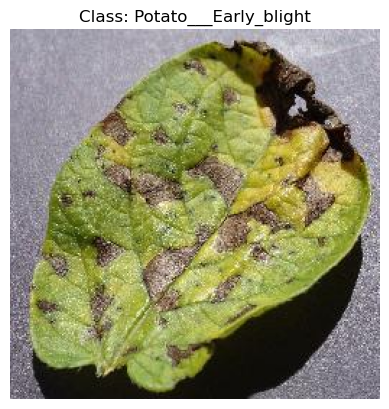

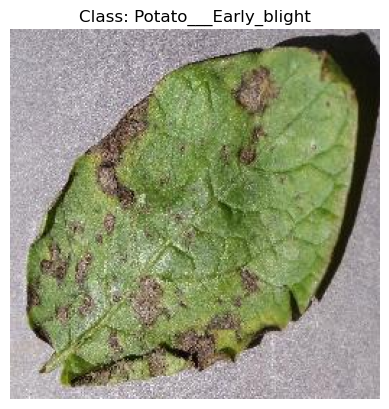

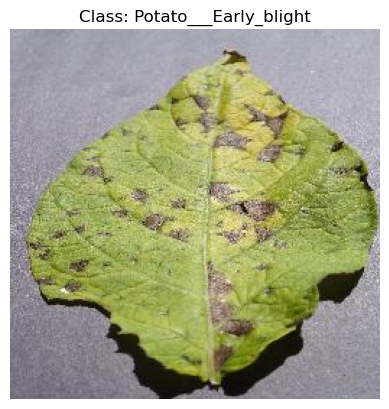

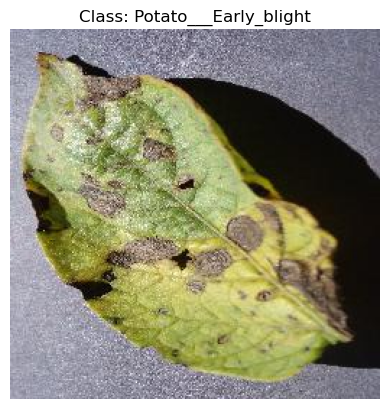

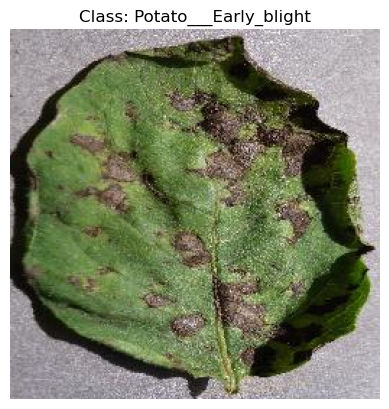

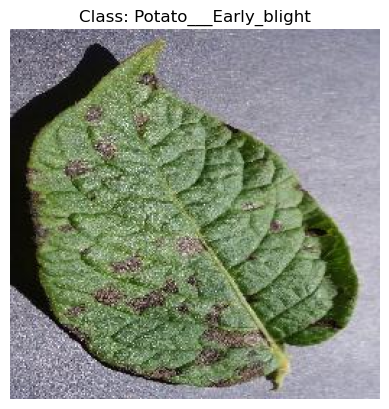

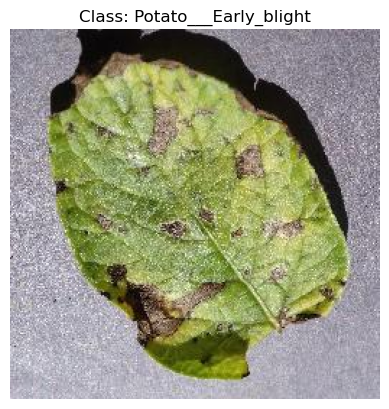

First 20 test images displayed ✅


In [30]:
import os
from PIL import Image

test_folder = r"C:\Users\Sachin Singh\Downloads\archive\Potato\Test"

images_shown = 0

for class_name in os.listdir(test_folder):
    class_path = os.path.join(test_folder, class_name)

    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            img = Image.open(img_path)

            plt.figure()
            plt.imshow(img)
            plt.title(f"Class: {class_name}")
            plt.axis("off")
            plt.show()

            images_shown += 1

            if images_shown == 20:
                break

    if images_shown == 20:
        break

print("First 20 test images displayed ✅")


Random Image to Predict
Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted Label: Potato___Early_blight
Confidence: 100.00%


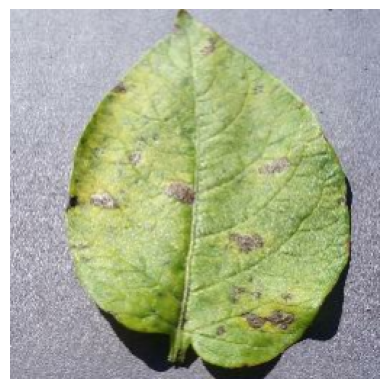

In [28]:
import numpy as np
import random


test_ds = test_ds.shuffle(1000)

for images_batch, labels_batch in test_ds.take(1):

    random_index = random.randint(0, len(images_batch)-1)

    random_image = images_batch[random_index].numpy().astype("uint8")
    random_label = labels_batch[random_index].numpy()

    print("Random Image to Predict")
    plt.imshow(random_image)
    plt.axis("off")

    print("Actual Label:", class_names[random_label])

    # Prediction
    batch_prediction = model.predict(images_batch)

    predicted_index = np.argmax(batch_prediction[random_index])
    predicted_label = class_names[predicted_index]
    confidence = np.max(batch_prediction[random_index]) * 100

    print("Predicted Label:", predicted_label)
    print("Confidence: {:.2f}%".format(confidence))


In [31]:

model.save("potato_disease_model.keras")

print("Model saved successfully ✅")


Model saved successfully ✅
